In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



print("setup ok")

setup ok


In [7]:
df = pd.read_csv("../Data/Nat_Gas.csv",index_col=0,parse_dates=True)  # remplace par le vrai nom
df.head()

C:\Users\33614\AppData\Local\Temp\ipykernel_26920\1755841930.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("../Data/Nat_Gas.csv",index_col=0,parse_dates=True)  # remplace par le vrai nom


,Prices
Dates,
2020-10-31,10.1
2020-11-30,10.3
2020-12-31,11.0
2021-01-31,10.9
2021-02-28,10.9


Text(0.5, 1.0, 'Natural Gas Prices Over Time')

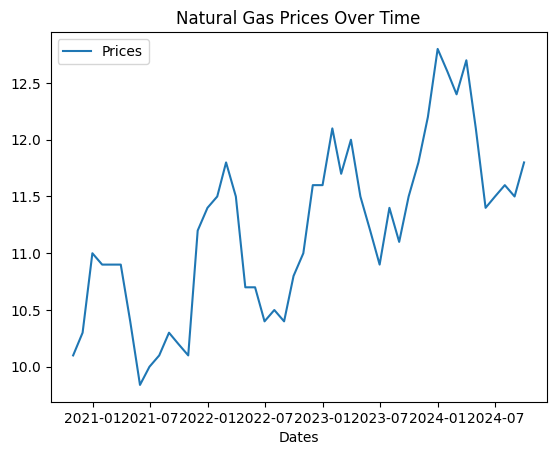

In [ ]:
sns.lineplot(data=df)
plt.title('Natural Gas Prices Over Time')

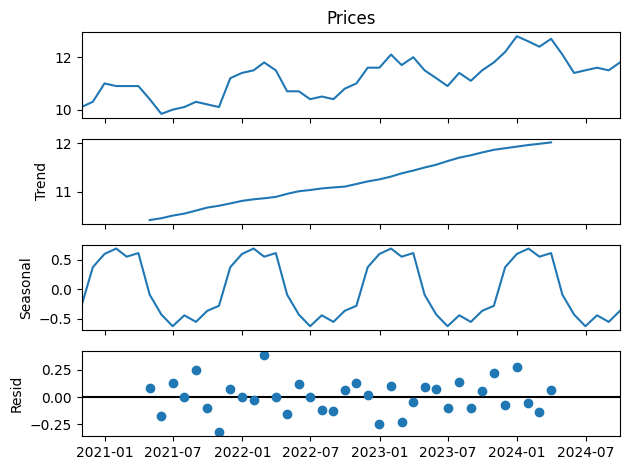

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Prices'], model='additive', period=12)
fig = decomposition.plot()

In [ ]:
#Based on the last cell, we assume the trand linearly increases over time.We then take the seasonal component into account. Finally, we can forecast the next values by adding the last observed value of the trend and the seasonal component for the next period.
Coeff = (decomposition.trend.dropna().iloc[-1]-decomposition.trend.dropna().iloc[-13]) / 12
print("Last observed trend value:", Coeff)
Season= decomposition.seasonal.iloc[-12:]
print("Seasonal component for the next period:", Season.values)
P0=decomposition.trend.dropna().iloc[0]
print('First observed price:',P0)


Last observed trend value: 0.048611111111111306
Seasonal component for the next period: [-0.28405093  0.3706713   0.59483796  0.68650463  0.54900463  0.61011574
 -0.09516204 -0.4318287  -0.62988426 -0.44516204 -0.55627315 -0.36877315]
First observed price: 10.411666666666665


In [ ]:
mon_for=12
i = np.arange(len(df)+mon_for)
seasonal_values = Season.values
series = P0 + i * Coeff + seasonal_values[i % 12]
start_date = pd.Timestamp('2020-10-01')
dates = pd.date_range(start=start_date, periods=len(df)+mon_for, freq='M')
forecasted = pd.Series(series, index=dates)
print("Forecasted series starting from 2010-10:")
print(forecasted.head())
print(forecasted.tail())

Forecasted series starting from 2010-10:
2020-10-31    10.127616
2020-11-30    10.830949
2020-12-31    11.103727
2021-01-31    11.244005
2021-02-28    11.155116
Freq: ME, dtype: float64
2025-05-31    12.653449
2025-06-30    12.504005
2025-07-31    12.737338
2025-08-31    12.674838
2025-09-30    12.910949
Freq: ME, dtype: float64


C:\Users\33614\AppData\Local\Temp\ipykernel_16596\2495696813.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start=start_date, periods=len(df)+mon_for, freq='M')


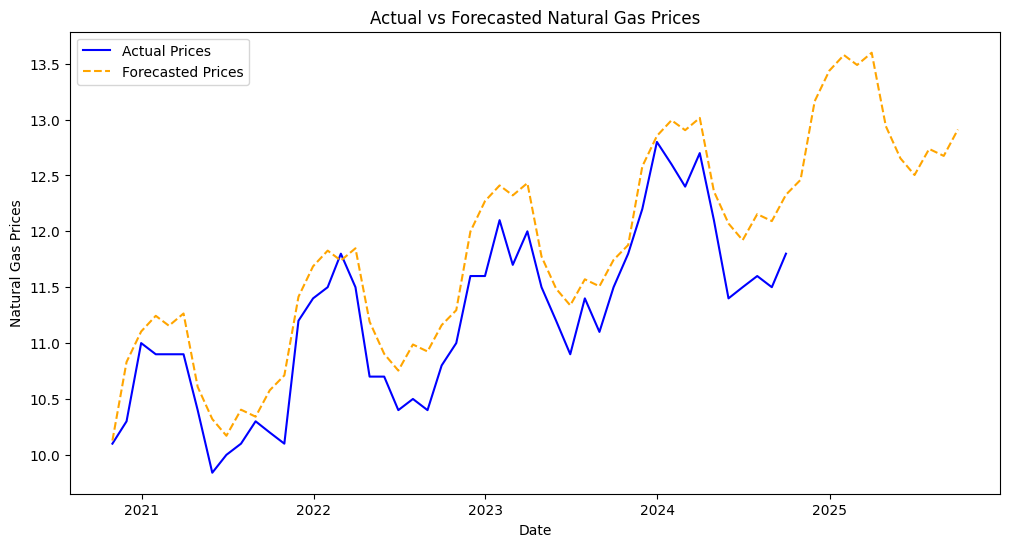

In [ ]:
#Show on the same plot the forecasted values and the real ones
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Prices'], label='Actual Prices', color='blue')
plt.plot(forecasted.index, forecasted.values, label='Forecasted Prices', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Natural Gas Prices')
plt.title('Actual vs Forecasted Natural Gas Prices')
plt.legend()
plt.show()
